In [1]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
using Luxor
using Colors

    Updating registry at `C:\Users\17404\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


In [2]:
phi = (1 + sqrt(5)) / 2

1.618033988749895

In [3]:
sidelength = 100

100

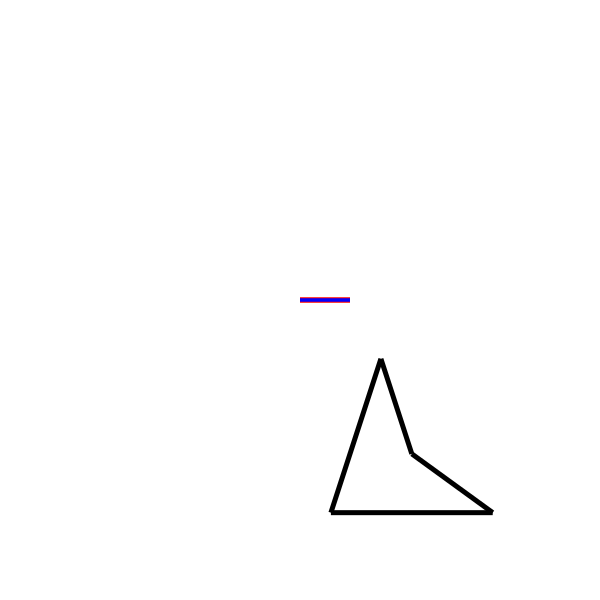

In [5]:
function dart(radialdistance, polarangle, orientation) #function for drawing a dart
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a dart 
    Pencolor(t, "Black")
    Forward(t, sidelength)
    Turn(t, -36)
    Forward(t, sidelength)
    Turn(t, 144)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 144)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a dart
    dart(100,36,72)
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

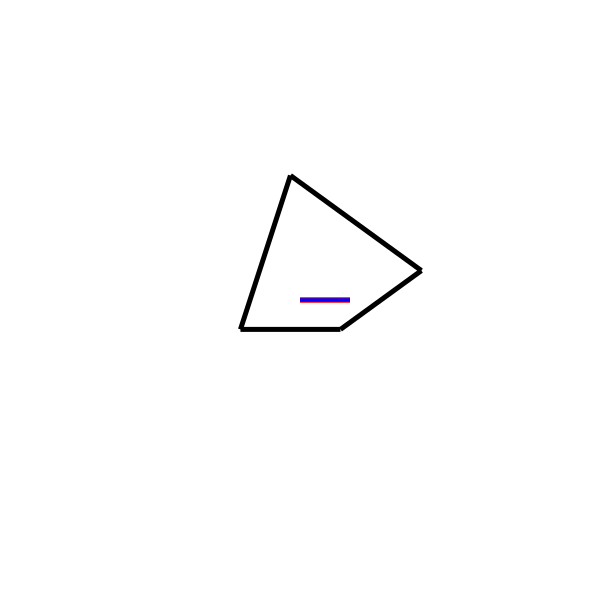

In [6]:
function kite(radialdistance, polarangle, orientation) #function for drawing a kite
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    #move the turtle to the position of starting place by polar coordinate and rotation
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    #start to draw a kite
    Pencolor(t, "Black")
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, -72)
    
    #move the turtle back to the origin
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    #check the starting point
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    #draw a kite
    kite(50,36,72)
    
    #check the ending point
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

In [7]:
function draw(graph) # function for drawing dart or kite by stored information
    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

draw (generic function with 1 method)

In [12]:
function substitution(graph) # function for generate the substitution by stored information
    for i in 1:length(graph)
        
        if graph[i][1] == "K"
            # by using polar coordinate and vector addition find the new starting point of drawing
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[1][4]) * pi / 180)
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[1][4]) * pi / 180)
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polorangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polorangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polorangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polorangle = 90
                elseif x == 0 && y < 0
                    new_polorangle = -90
                elseif x == 0 && y == 0
                    new_polorangle = 0
                end
            
            #do the substitution by adding them into the list
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] + 108])
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polorangle,graph[i][4] + 144])
            
        else
            # by using polar coordinate and vector addition find the new starting point of drawing
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] * pi / 180))
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos(-(graph[i][4] * pi / 180))
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polorangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polorangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polorangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polorangle = 90
                elseif x == 0 && y < 0
                    new_polorangle = -90
                elseif x == 0 && y == 0
                    new_polorangle = 0
                end
            
            #do the substitution by adding them into the list
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polorangle,graph[i][4] + 144])
        end
        
    end
end

substitution (generic function with 1 method)

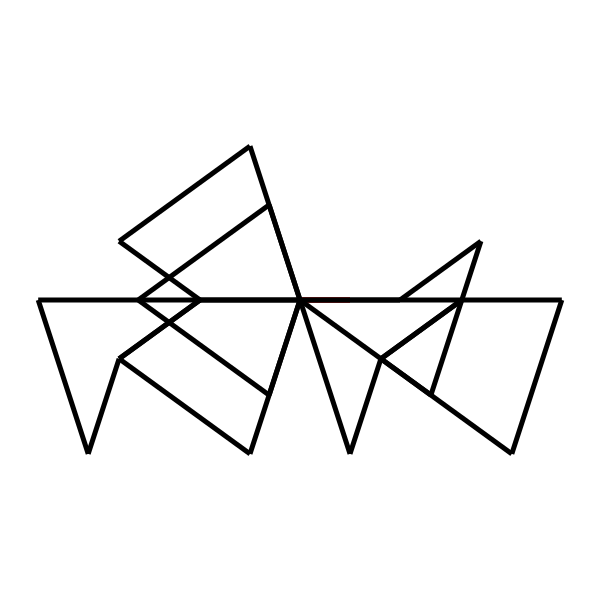

In [13]:
graph = [["K",0,0,0],["D",0,0,0]] #stored information

substitution(graph)#substitution

#drawing them by turtle
@draw begin
    t = Turtle()
    Penwidth(t,5)

    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    draw(graph)
end